## 4차 프로그래밍 과제

    Vendor    Model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0  adviser    32/60   125   256   6000   256     16    128  198  199
1   amdahl   470v/7    29  8000  32000    32      8     32  269  253
2   amdahl  470v/7a    29  8000  32000    32      8     32  220  253
3   amdahl  470v/7b    29  8000  32000    32      8     32  172  253
4   amdahl  470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vendor  209 non-null    object
 1   Model   209 non-null    object
 2   MYCT    209 non-null    int64 
 3   MMIN    209 non-null    int64 
 4   MMAX    209 non-null    int64 
 5   CACH    209 non-null    int64 
 6   CHMIN   209 non-null    int64 
 7   CHMAX   209 non-null    int64 
 8   PRP     209 non-null    int64 
 9   ERP     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ K

C:\Users\smh79\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


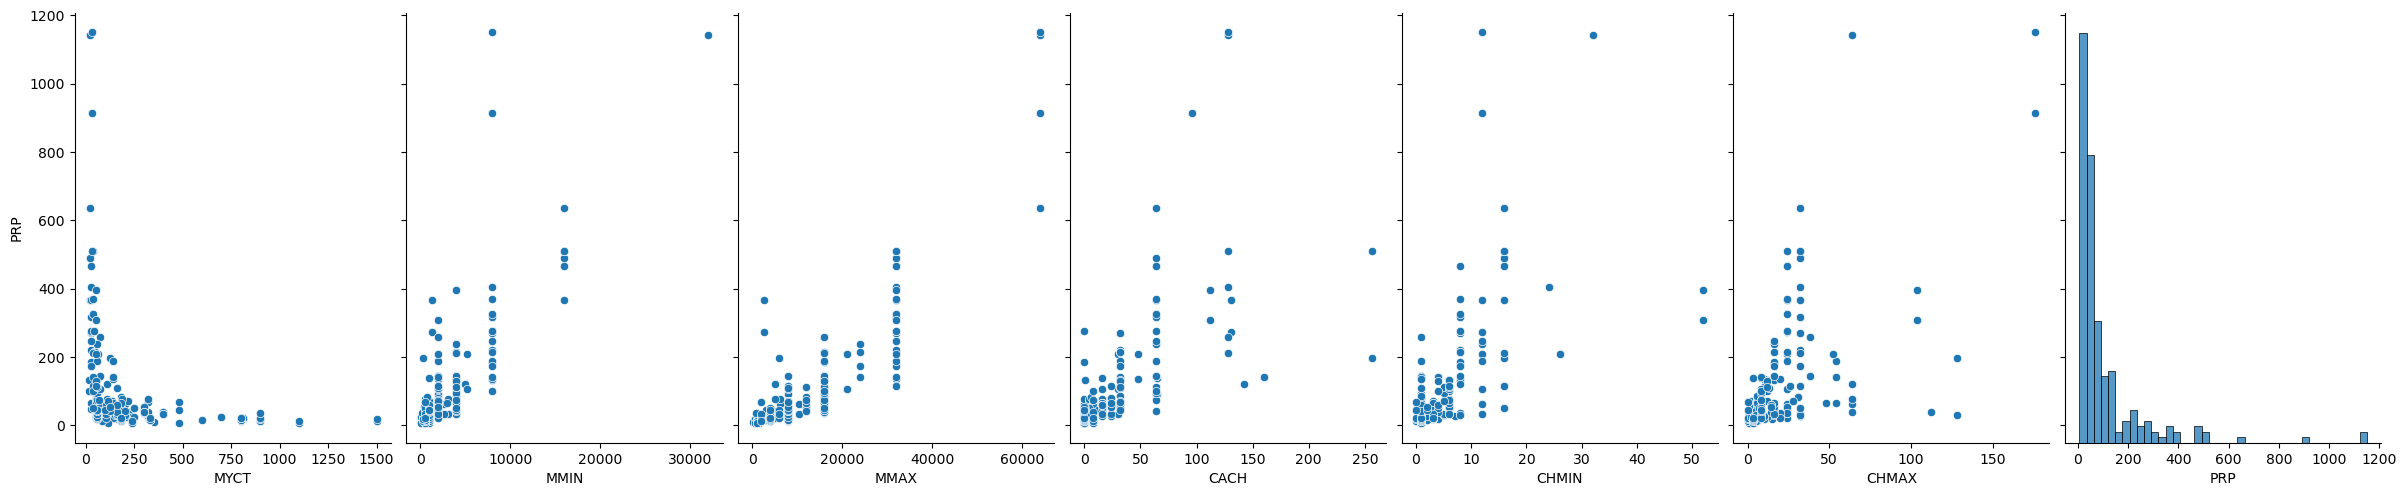

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
column_names = ["Vendor", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(url, names=column_names)

# 데이터 요약
print(data.head())
print(data.info())

# 타겟 변수(PRP)와 다른 변수들 간의 관계 시각화
sns.pairplot(data, x_vars=column_names[2:-1], y_vars='PRP', height=5, aspect=0.7)
plt.show()


In [ ]:
# 불필요한 컬럼 제거
data = data.drop(columns=["Vendor", "Model", "ERP"])

# 결측치 확인 및 처리
print(data.isnull().sum())
data = data.dropna()

# 설명 변수(X)와 타겟 변수(y) 분리
X = data.drop(columns="PRP")
y = data["PRP"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Pipeline 생성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# 하이퍼파라미터 튜닝
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R^2: {grid_search.best_score_}")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 최적 모델 추출
best_model = grid_search.best_estimator_

# 훈련 데이터 예측
y_train_pred = best_model.predict(X_train)

# 테스트 데이터 예측
y_test_pred = best_model.predict(X_test)

# 성능 평가
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"훈련 데이터 MSE: {mse_train}, MAE: {mae_train}, R^2: {r2_train}")
print(f"테스트 데이터 MSE: {mse_test}, MAE: {mae_test}, R^2: {r2_test}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# 특성 선택
selector = RFE(LinearRegression(), n_features_to_select=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 새로운 Pipeline 생성
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# 하이퍼파라미터 튜닝
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='r2')
grid_search_rf.fit(X_train_selected, y_train)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation R^2: {grid_search_rf.best_score_}")


In [ ]:
# 성능 결과 저장
results = pd.DataFrame({
    'Model': ['Base Train', 'Base Test', 'Optimized Train', 'Optimized Test'],
    'MSE': [mse_train, mse_test, mse_train_rf, mse_test_rf],
    'MAE': [mae_train, mae_test, mae_train_rf, mae_test_rf],
    'R^2': [r2_train, r2_test, r2_train_rf, r2_test_rf]
})


In [ ]:
# 최적 모델 추출
best_model_rf = grid_search_rf.best_estimator_

# 훈련 데이터 예측
y_train_pred_rf = best_model_rf.predict(X_train_selected)

# 테스트 데이터 예측
y_test_pred_rf = best_model_rf.predict(X_test_selected)

# 성능 평가
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"훈련 데이터 MSE: {mse_train_rf}, MAE: {mae_train_rf}, R^2: {r2_train_rf}")
print(f"테스트 데이터 MSE: {mse_test_rf}, MAE: {mae_test_rf}, R^2: {r2_test_rf}")


In [ ]:
# 결과 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

results.plot(kind='bar', x='Model', y='MSE', ax=axes[0], title='Mean Squared Error')
results.plot(kind='bar', x='Model', y='MAE', ax=axes[1], title='Mean Absolute Error')
results.plot(kind='bar', x='Model', y='R^2', ax=axes[2], title='R^2 Score')

plt.show()
